## Metadado 
- Campaign Name: The name of the campaign
- Date: Date of the record
- Spend: Amount spent on the campaign in dollars
- f Impressions: Number of impressions the ad crossed through the campaign
- Reach: The number of unique impressions received in the ad
- of Website Clicks: Number of website clicks received through the ads
- of Searches: Number of users who performed searches on the website
- of View Content: Number of users who viewed content and products on the website
- of Add to Cart: Number of users who added products to the cart
- of Purchase: Number of purchases

---

## Bibliotecas utilizadas

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

## Load e união dos datasets

In [16]:
control_group = pd.read_csv("C:/Users/teodo/OneDrive/Documentos/Projects/analise-teste-AB/Data/control_group.csv", delimiter=";")

In [17]:
test_group = pd.read_csv("C:/Users/teodo/OneDrive/Documentos/Projects/analise-teste-AB/Data/test_group.csv", delimiter=";")

In [18]:
test_group.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [19]:
test_group["Group"] = "Test"
control_group["Group"] = "Control"

In [20]:
df = pd.concat([control_group,test_group], ignore_index=True)

---

## Análise inicial dos dados

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
 10  Group                60 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 5.3+ KB


In [23]:
df.head(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Control
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Control
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,Control
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,Control
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,Control
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,Control
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,Control


In [25]:
df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
Group                  0
dtype: int64

## Análise de valor vazio
Durante a fase de limpeza dos dados, foi identificada uma única linha (referente ao dia 05.08.2019 no grupo de controle) com múltiplos valores ausentes em colunas críticas para o cálculo das taxas de conversão. Dado o baixo impacto da remoção de uma única observação no conjunto de dados geral, a linha foi completamente removida para garantir a integridade e a precisão da análise subsequente.

In [26]:
# Removendo a linha com valores ausentes
df= df.dropna()

## Análise descritiva

In [28]:
df.groupby("Group").sum()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
Group,,,,,,,,,,
Control,Control CampaignControl CampaignControl Campai...,1.08.20192.08.20193.08.20194.08.20196.08.20197...,66818,3177233.0,2576503.0,154303.0,64418.0,56370.0,37700.0,15161.0
Test,Test CampaignTest CampaignTest CampaignTest Ca...,1.08.20192.08.20193.08.20194.08.20195.08.20196...,76892,2237544.0,1604747.0,180970.0,72569.0,55740.0,26446.0,15637.0


Para começar podemos perceber que na nova campanha houve um maior gasto, porém menos impressões e o anúncio conseguiu mais cliques, houve mais buscas, o ideal agora é transformar esses números absolutos em métricas de eficiência (taxas). É isso que vai nos permitir comparar as duas campanhas de forma justa, independentemente do quanto foi gasto em cada uma

---

## Calculando métricas de eficiência

### CTR

In [38]:
# Taxa de clique (CTR - Click Through Rate)
df["CTR"] = (df["# of Website Clicks"] / df["# of Impressions"]) * 100

# Calcular a média de CTR por grupo
ctr_media = df["CTR"].groupby(df["Group"]).mean()
print(f"CTR Média por Grupo: { ctr_media }")

CTR Média por Grupo: Group
Control     5.095871
Test       10.242260
Name: CTR, dtype: float64


C:\Users\teodo\AppData\Local\Temp\ipykernel_27400\1503585214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Group", y = "CTR", data = df, palette="viridis")


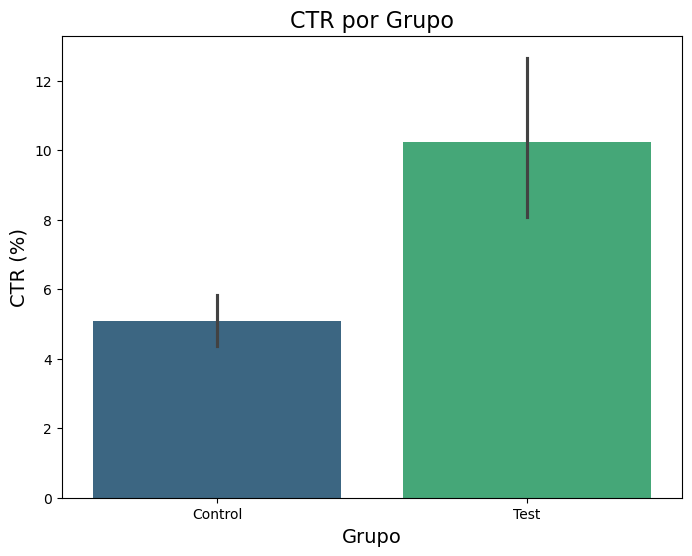

In [ ]:
# Visualização 
# Tamanho da figura
plt.figure(figsize=(8, 6))

# Gráfico de barras
sns.barplot(x = "Group", y = "CTR", data = df, palette="viridis")

# Título e rótulos
plt.title("CTR por Grupo", fontsize=16)
plt.ylabel("CTR (%)", fontsize=14)
plt.xlabel("Grupo", fontsize=14)
plt.show()

### Insight CTR
- A campanha de Teste apresentou um CTR médio de 10.24%, significativamente maior que o CTR de 5.09% da campanha de Controle. Isso indica que o anúncio ou a segmentação do grupo de teste foi muito mais eficaz em atrair o interesse do público e gerar cliques a partir das impressões.

### Insight das barras pretas no gráfico
- Agora, a parte mais interessante. Essas linhas pretas no topo das barras são as barras de erro. Por padrão na biblioteca Seaborn, elas representam o intervalo de confiança de 95% para a média que está sendo exibida. Elas nos dão uma ideia da variabilidade e da certeza que temos sobre aquele valor médio.

    - Portanto, se os intervalos de confiança dos dois grupos não se sobrepõem, é um forte indicativo de que a diferença entre eles é estatisticamente significativa.
    - O topo do intervalo de confiança do grupo "Control" fica por volta de 6%.
    - A base do intervalo de confiança do grupo "Test" começa por volta de 8%.
Eles não se cruzam de forma alguma.

- Isso nos dá uma confiança muito alta de que a performance superior do CTR do grupo de Teste não é um acaso, ou seja, diferença é real e significativa. Quando formos fazer o teste de hipótese formal para o CTR, é quase certo que o p-valor será muito baixo (bem menor que 0.05).

---

### Taxa adicionar no carrinho

In [ ]:
# Taxa de adicionar no carrinho (Add to Cart Rate)
df["Taxa_add_carrinho"] = (df["# of Add to Cart"] / df["# of Website Clicks"]) * 100

media_add_carrinho = df["Taxa_add_carrinho"].groupby(df["Group"]).mean()
print(f"Taxa de Adicionar no Carrinho Média por Grupo: { media_add_carrinho }")

Taxa de Adicionar no Carrinho Média por Grupo: Group
Control    27.820856
Test       15.791233
Name: Taxa_add_carrinho, dtype: float64


C:\Users\teodo\AppData\Local\Temp\ipykernel_27400\3471489730.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Taxa_add_carrinho', data=df, palette='viridis')


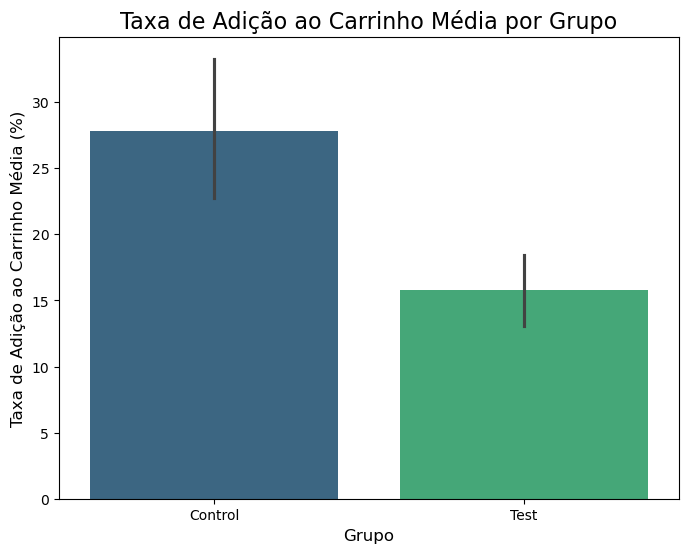

In [53]:
# Visualização
# Tamanho da figura
plt.figure(figsize=(8, 6))

sns.barplot(x='Group', y='Taxa_add_carrinho', data=df, palette='viridis')

# Título e rótulos
plt.title('Taxa de Adição ao Carrinho Média por Grupo', fontsize=16)
plt.ylabel('Taxa de Adição ao Carrinho Média (%)', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.show()

### Insight Taxa de adição ao carrinho
- O grupo de Controle é massivamente superior em convencer os usuários a adicionarem produtos ao carrinho, com uma taxa de quase 28%, enquanto o grupo de Teste convence apenas cerca de 16% 

---

### Taxa de compra

In [45]:
# Taxa de compra (Purchase Rate)
df["Taxa_compra"] = (df["# of Purchase"] / df["# of Website Clicks"]) * 100

media_compra = df["Taxa_compra"].groupby(df["Group"]).mean()
print(f"Taxa de Compra Média por Grupo: { media_compra }")

Taxa de Compra Média por Grupo: Group
Control    11.477203
Test        9.231182
Name: Taxa_compra, dtype: float64


C:\Users\teodo\AppData\Local\Temp\ipykernel_27400\2795530270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Group", y = "Taxa_compra", data=df, palette="viridis")


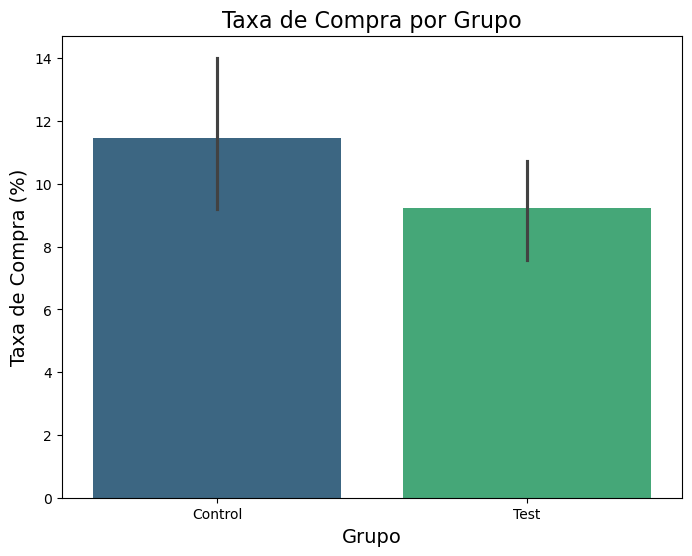

In [46]:
# Visualização 
# Tamanho da figura
plt.figure(figsize=(8, 6))

# Gráfico de barras
sns.barplot(x = "Group", y = "Taxa_compra", data=df, palette="viridis")

# Título e rótulos
plt.title("Taxa de Compra por Grupo", fontsize=16)
plt.ylabel("Taxa de Compra (%)", fontsize=14)
plt.xlabel("Grupo", fontsize=14)
plt.show()

### Insight Taxa de compras
- Ao olhar somente os valores da taxa de compra, a taxa de compra média do grupo de Controle (11.48%) é visivelmente maior que a do grupo de Teste (9.23%). Em uma análise superficial, poderíamos dizer que a campanha antiga é melhor em converter vendas.
- Entretanto, a há uma clara sobreposição das barras de erro dos grupos. Essa sobreposição é a evidência visual de que não podemos afirmar com 95% de confiança que a diferença entre os grupos é significativa. É muito provável que a performance superior do grupo de Controle nesta amostra seja apenas fruto do acaso ou da variabilidade natural dos dados.

---

## Análise do Funil
Essa análise de funil (Taxa de clique, taxa de adicionar no carrinho e taxa de compra) é o que nos dá a visão completa da jornada do cliente e pode nos dizer onde no processo a experiência do usuário divergiu

1. O Anúncio (Topo do Funil): A campanha de Teste tem um anúncio brilhante. Ele é criativo, atrativo e funciona como um ímã para gerar cliques (lembra do CTR altíssimo e significativo?).

2. A Página de Produto (Meio do Funil): Aqui está o grande problema. Embora o anúncio da campanha de Teste traga muitas pessoas para a "loja", a página de produto não as convence. Os usuários chegam, olham e vão embora sem adicionar o produto ao carrinho. A página da campanha de Controle, por outro lado, é muito mais eficaz em persuadir o visitante a dar o próximo passo.

3. A Venda (Fundo do Funil): Essa enorme "hemorragia" de usuários na etapa de adicionar ao carrinho no grupo de Teste é o que, no final, leva a uma taxa de compra inferior. O problema principal não está no processo de checkout, mas sim na página do produto em si.

## Recomendação Final
- A estratégia ideal seria combinar o anúncio da campanha de Teste (que é ótimo para atrair tráfego) com a página de produto da campanha de Controle (que é ótima para engajar o cliente).

In [54]:
# Obter os totais para o grupo de Controle
compras_control = df[df['Group'] == 'Control']['# of Purchase'].sum()
cliques_control = df[df['Group'] == 'Control']['# of Website Clicks'].sum()

# Obter os totais para o grupo de Teste
compras_test = df[df['Group'] == 'Test']['# of Purchase'].sum()
cliques_test = df[df['Group'] == 'Test']['# of Website Clicks'].sum()

print(f"Controle: {compras_control} compras de {cliques_control} cliques.")
print(f"Teste: {compras_test} compras de {cliques_test} cliques.")

Controle: 15161.0 compras de 154303.0 cliques.
Teste: 15637.0 compras de 180970.0 cliques.


In [55]:
from statsmodels.stats.proportion import proportions_ztest

# Crie uma lista com o número de sucessos (compras)
# A ordem é [Teste, Controle]
count = [compras_test, compras_control] 

# Crie uma lista com o número de tentativas (cliques)
nobs = [cliques_test, cliques_control]

# Execute o teste
stat, p_value = proportions_ztest(count, nobs)

# Exiba o resultado formatado
print(f'P-Valor do teste: {p_value:.5f}')

P-Valor do teste: 0.00000


## Análise do P-Valor
- A análise visual inicial, baseada nas médias das taxas diárias, sugere que a diferença pode não ser significativa devido à sobreposição das barras de erro, que refletem a alta variabilidade diária. No entanto, ao realizar um teste Z de proporções com os dados agregados (o método padrão para testes A/B), encontramos um p-valor de 0.00000. Isso confirma que a taxa de compra do grupo de Controle é, de fato, estatisticamente superior à do grupo de Teste, embora a diferença absoluta seja pequena. Essa descoberta reforça a conclusão de que a página do grupo Controle é mais eficaz na conversão final.